##### Dataset

In [1]:
# Mall_Customers.csv
# https://mitu.co.in/dataset

##### Load the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Read the dataset

In [3]:
df = pd.read_csv('datasets/Mall_Customers.csv')

In [7]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

##### Decide the features

In [6]:
x = df.iloc[:,[3,4]]

In [7]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


##### Elbow Method

In [9]:
from sklearn.cluster import KMeans

In [28]:
km = KMeans(random_state=0, n_clusters=7, n_init='auto')

In [29]:
labels = km.fit_predict(x)

In [30]:
labels

array([3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 4, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 4, 5, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6,
       2, 6], dtype=int32)

In [31]:
km.inertia_

31969.426550235476

In [32]:
sse = []

for i in range(1,16):
    km = KMeans(random_state=0, n_clusters=i, n_init='auto')
    km.fit_predict(x)
    sse.append(km.inertia_)

In [33]:
sse

[269981.28,
 185917.14253928524,
 106348.37306211118,
 73679.78903948833,
 44448.45544793371,
 38858.9599751439,
 31969.42655023548,
 29858.483597603947,
 22209.851608025547,
 20786.93669205916,
 18612.22286800968,
 17083.672501709316,
 16511.947370563896,
 15599.148331445118,
 14697.298899626936]

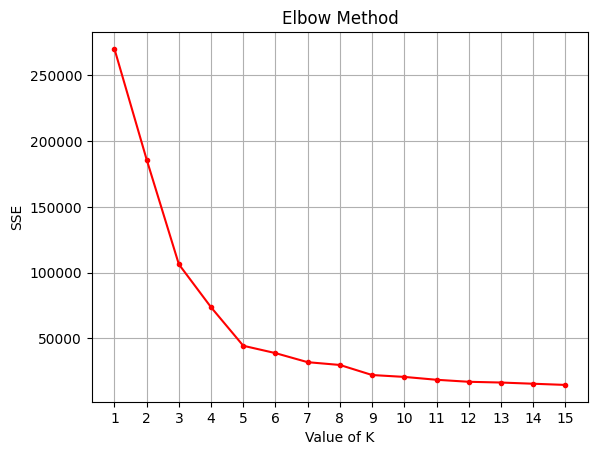

In [35]:
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker='.', color='r')

In [36]:
pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
from kneed import KneeLocator

In [38]:
help(KneeLocator)

Help on class KneeLocator in module kneed.knee_locator:

class KneeLocator(builtins.object)
 |  KneeLocator(x: Iterable[float], y: Iterable[float], S: float = 1.0, curve: str = 'concave', direction: str = 'increasing', interp_method: str = 'interp1d', online: bool = False, polynomial_degree: int = 7)
 |  
 |  Once instantiated, this class attempts to find the point of maximum
 |  curvature on a line. The knee is accessible via the `.knee` attribute.
 |  
 |  :param x: x values, must be the same length as y.
 |  :type x: 1D array of shape (`number_of_y_values`,) or list
 |  :param y: y values, must be the same length as x.
 |  :type y: 1D array of shape (`number_of_y_values`,) or list
 |  :param S: Sensitivity, the number of minimum number of data points below the local distance maximum before calling a knee. The original paper suggests default of 1.0
 |  :type S: float
 |  :param curve: If 'concave', algorithm will detect knees. If 'convex', it
 |      will detect elbows.
 |  :type cur

In [56]:
kl = KneeLocator(range(1,16), sse, curve='convex', direction='decreasing')

In [57]:
kl.elbow

5

##### Silhoutte Score

In [59]:
from sklearn.metrics import silhouette_score

In [61]:
silh = []

for i in range(2,16):
    km = KMeans(random_state=0, n_clusters=i, n_init='auto')
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

<BarContainer object of 14 artists>

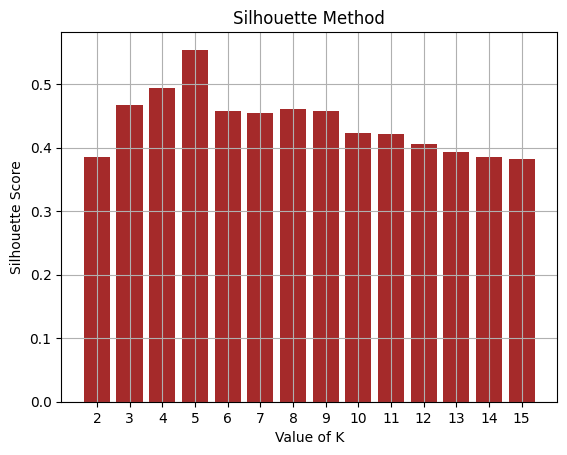

In [62]:
plt.title('Silhouette Method')
plt.xlabel('Value of K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16), silh, color='brown')

##### Build the clusters

In [64]:
km = KMeans(random_state=0, n_clusters=5, n_init='auto')

In [65]:
labels = km.fit_predict(x)

In [66]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [67]:
km.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [68]:
km.inertia_

44448.4554479337

In [69]:
cents = km.cluster_centers_

In [70]:
cents

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

##### Visualize the clusters

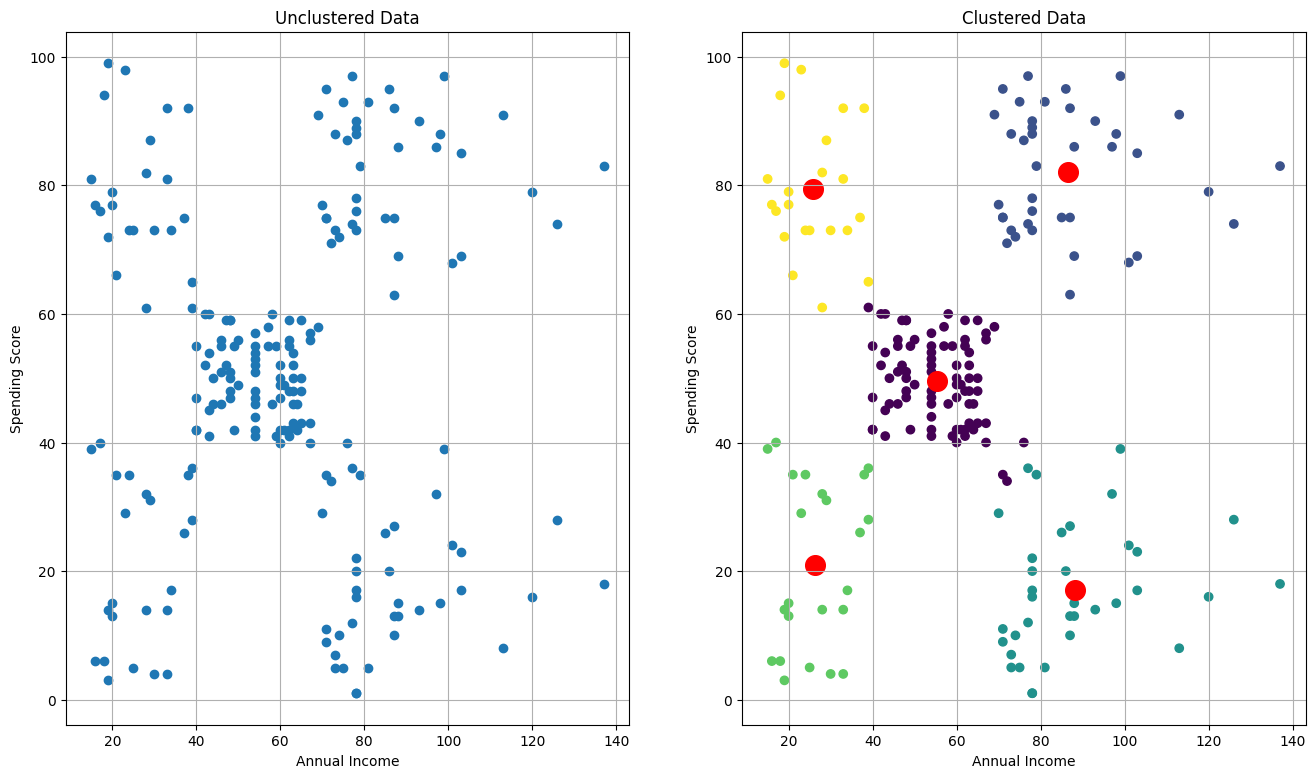

In [76]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1])

plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1], c = labels)
plt.scatter(cents[:,0], cents[:,1], s = 200, color = 'r');

##### Extract clusters

In [78]:
zero = df[labels==0]

In [79]:
zero

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34


In [82]:
zero = df[labels==0]
one = df[labels==1]
two = df[labels==2]
three = df[labels==3]
four = df[labels==4]

In [83]:
zero.shape, one.shape, two.shape, three.shape, four.shape

((81, 5), (39, 5), (35, 5), (23, 5), (22, 5))

##### Classify / Cluster new customer

In [85]:
new = pd.DataFrame(data=[[45,12],[98,67],[34,10],[78,65],[55,56]],
                  columns=x.columns)

In [86]:
new

,Annual Income (k$),Spending Score (1-100)
0,45,12
1,98,67
2,34,10
3,78,65
4,55,56


In [87]:
km.predict(new)

array([3, 1, 3, 1, 0], dtype=int32)

##### Export the clusters

In [90]:
zero.to_csv('datasets/customers0.csv', index = False)